# ***Exploratory Data Analysis***

### **1. Importing Libraries**

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Loading dataset** 

In [2]:
data = pd.read_csv('data/gurgaon_properties_cleaned(round2).csv')

In [3]:
data.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,1,0
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,...,1702.0,1540.0,1430.0,1,0,0,0,0,2,174
2,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,...,NaN,NaN,1375.0,0,0,0,1,0,1,49
3,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,...,2436.0,2236.0,2036.0,0,1,0,1,0,1,165
4,flat,puri emerald bay,sector 104,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,...,2450.0,NaN,2250.0,0,1,0,0,0,1,159


### **3. Missing Values** 

In [4]:
data.isnull().sum()

property_type             0
society                   0
sector                    0
price                    18
area                     18
price_per_sqft           18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  96
floorNum                 19
facing                  846
agePossession             0
super_built_up_area    1900
built_up_area          2070
carpet_area            1871
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3815 non-null   object 
 1   society              3815 non-null   object 
 2   sector               3815 non-null   object 
 3   price                3797 non-null   float64
 4   area                 3797 non-null   float64
 5   price_per_sqft       3797 non-null   float64
 6   areaWithType         3815 non-null   object 
 7   bedRoom              3815 non-null   int64  
 8   bathroom             3815 non-null   int64  
 9   balcony              3719 non-null   object 
 10  floorNum             3796 non-null   float64
 11  facing               2969 non-null   object 
 12  agePossession        3815 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1745 non-null   float64
 15  carpet_area          1944 non-null   f

### **3. Checking duplicates**

In [6]:
# checking the duplicate values
data.duplicated().sum()

np.int64(139)

In [7]:
data[data.duplicated()]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
404,flat,shapoorji pallonji joyville gurugram,sector 102,2.12,1250.0,16960.0,Built Up area: 1852 (172.06 sq.m.)Carpet area:...,3,3,3,...,NaN,1852.0,1250.00000,0,0,0,0,0,2,72
632,flat,unitech uniworld gardens,sector 47,1.05,997.0,10531.0,Carpet area: 997 (92.62 sq.m.),2,2,2,...,NaN,NaN,997.00000,0,0,0,0,0,1,34
680,flat,bhagwati sadan,sector 12,1.15,2091.0,5500.0,Built Up area: 2000 (185.81 sq.m.),3,4,2,...,NaN,2000.0,NaN,0,1,0,0,1,2,0
684,flat,godrej,sector 79,1.29,1572.0,8206.0,Super Built up area 1572(146.04 sq.m.),2,2,3,...,1572.0,NaN,NaN,0,0,0,0,0,2,0
786,flat,shree vardhman victoria,sector 70,1.90,1950.0,9743.0,Super Built up area 1950(181.16 sq.m.),3,3,3,...,1950.0,NaN,NaN,0,1,1,1,1,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,flat,umang winter hills,sector 77,1.00,1333.0,7500.0,Carpet area: 1340 (124.49 sq.m.),2,2,2,...,NaN,NaN,1340.00000,0,0,0,0,0,2,74
3748,flat,microtek greenburg,sector 86,1.45,1480.0,9797.0,Built Up area: 1480 (137.5 sq.m.)Carpet area: ...,3,2,3,...,NaN,1480.0,1050.00000,0,0,0,0,0,0,72
3757,flat,emaar imperial gardens,sector 102,1.98,2000.0,9900.0,Carpet area: 2000 (185.81 sq.m.),3,3,3+,...,NaN,NaN,2000.00000,0,1,0,0,0,1,72
3789,flat,ats triumph,sector 104,2.00,2290.0,8733.0,Super Built up area 2290(212.75 sq.m.),3,4,3+,...,2290.0,NaN,NaN,0,1,0,0,0,2,60


These values are not actually duplicate

### **4. EDA**

#### **4.1 Property type**

In [8]:
data['property_type'].value_counts()

property_type
flat     2942
house     873
Name: count, dtype: int64

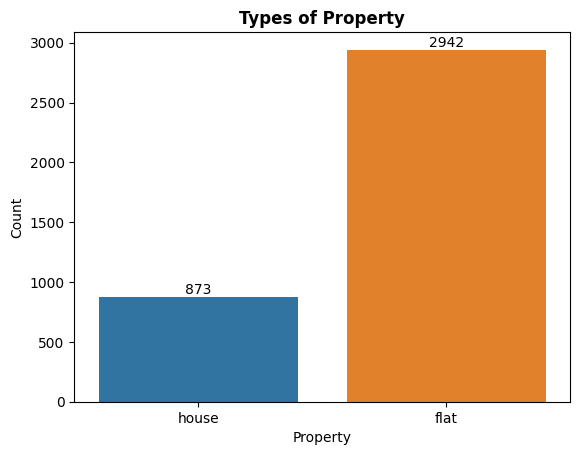

In [14]:
ax = sns.countplot(data=data, x='property_type', hue='property_type')

for bar in ax.patches:
    # Get the height of each bar (count value)
    count = bar.get_height()
    # Add the text on top of the bar
    if count > 0:  # To avoid adding text to bars with zero height
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate
            count,                              # Y-coordinate
            int(count),                         # Text (integer count)
            ha='center',                        # Horizontal alignment
            va='bottom'                         # Vertical alignment
        )

plt.title('Types of Property', fontweight='bold')
plt.xlabel('Property')
plt.ylabel('Count')
plt.show()